In [1]:
import numpy as np 
from sklearn.neural_network import MLPClassifier
import matplotlib.pyplot as plt

In [2]:
#XOR
X = np.array([[0,0],
              [1,0],
              [0,1],
              [1,1]])
y = np.array([
    [0],
    [1],
    [1],
    [0]
])

In [3]:
"""model = MLPClassifier(
    hidden_layer_sizes=(3),
    activation='logistic',
    learning_rate_init=1,
    learning_rate='constant',
    max_iter=100000,
    batch_size='auto',
    tol=1e-6,
    verbose=True,
    #random_state=42,
    solver='sgd',
    n_iter_no_change=1000
).fit(X,y.reshape(len(y)))"""

"""model.predict(X)"""

'model.predict(X)'

# Deep Network with Logistic Sigmoid activation

With activation function:

$\sigma(x)=\frac{1}{1+e^{(-x)}}$

Which is differentiable as:

$\sigma '(x)= \sigma(x) * (1 - \sigma(x))$

XOR data defined as:

$$
X = \begin{vmatrix}
    0 & 0 \\
    1 & 0 \\
    0 & 1 \\
    1 & 1 
    \end{vmatrix}  
$$
$$
y = \begin{vmatrix}
    0\\
    1\\
    1\\
    0
    \end{vmatrix}
$$

A network with one hidden layers, of dimension 2 and having bias is defined as:

$Z_1 = {X}\cdot{W_1}+{B_1} $  
$H = \sigma( Z_1 )$  
$Z_2 = {H}\cdot{W_2}+{B_2} $  
$\hat{y} = \sigma( Z_2 )$  

With weight matrices $W_1$ and $W_2$ randomly initialized with dimensions:

$dims(W_1) = 2*2$  
$dims(W_2) = 2*1$  

And bias vectors $B_1$ and $B_2$ randomly initialized with dimensions:

$dims(B_1) = 1*2$  
$dims(B_2) = 1*1$  

Solving the network using back propogation, having cost defined as:  

$C = .5*(\hat{y} - y)^{2}$  

Yields the gradient respecting the output layer activation:

$\delta _y = \frac{\delta C}{\delta \hat{y}} = (\hat{y} - y) * \sigma '({H}\cdot{W_2}+{B_2})$  

Gradients respecting the output layer weights and bias:

$\frac{\delta C}{\delta W_2} = H^T \cdot \delta _y $

$\frac{\delta C}{\delta B_2} = \delta _y $

The gradient respecting the hidden layer activation:

$\delta _H = \frac{\delta C}{\delta H} =  (\hat{y} - y) * \sigma '({H}\cdot{W_2}+{B_2}) \cdot W_2^T \cdot \sigma '( Z_1 ) = \delta _y \cdot W_2^T \cdot \sigma '( Z_1 )$

And the gradients respecting the hidden layer weights and biases:

$\frac{\delta C}{\delta W_1} = X^T \cdot \delta _H $

$\frac{\delta C}{\delta B_1} = \delta _H $


In [4]:

def relu(x,w,b):
	y = x@w + b
	return np.where(y>0,y,0)

def d_relu(x,w,b):
	return np.where(relu(x,w,b)>0,1,0)

def sigmoid(x,w,b):
	return 1/np.float64(1+np.exp(-(x@w + b)))

def d_sigmoid(x,w,b):
	return sigmoid(x,w,b)*(1 - sigmoid(x,w,b))

def d2_sigmoid(x,w,b):
	return d_sigmoid(x,w,b) - (2*sigmoid(x,w,b)*d_sigmoid(x,w,b))

def createweights(s):
	layers=len(s)
	layer=0
	weights=[]
	while layer<layers-1:
		w=np.random.normal(0,.05,(s[layer],s[layer+1]))
		weights.append(w)
		layer=layer+1
	return weights
	
def createbias(s):
	layers=len(s)
	layer=0
	bias=[]
	while layer<layers-1:
		w=np.random.normal(0,.05,(s[layer+1]))
		bias.append(w)
		layer=layer+1
	return bias
	
def predict(train,weights,bias,s):
	layers=len(s)
	layer=0
	inputs=[train]
	while layer<layers-1:
		if layer==layers-2:
			activation = sigmoid
		else:
			activation = sigmoid
		pred=activation(inputs[layer],weights[layer],bias[layer])
		inputs.append(pred)
		layer=layer+1
	return inputs

def backprop(inputs,y, weights,bias, s,lr=.01):

	layers=len(s)
	layer=layers-1
	d_out=inputs[layer]-y

	weights_new = weights
	bias_new = bias

	gradients_weight = []
	gradients_bias = []

	while layer>0:

		if layer == layers - 1:
			deriv = d_sigmoid
		else:
			deriv = d_sigmoid 

		input_values=inputs[layer-1]

		d_out = (d_out * deriv(input_values,weights[layer-1],bias[layer-1]))


		grad_weights = input_values.T@d_out 
		grad_bias = np.sum(d_out,axis=0)

		weights_new[layer-1]=weights[layer-1]-lr*grad_weights.reshape(weights[layer-1].shape)
		bias_new[layer-1]=bias[layer-1]-lr*grad_bias.reshape(bias[layer-1].shape)

		gradients_weight.append(grad_weights)
		gradients_bias.append(grad_bias)

		d_out = d_out@weights[layer-1].T

		layer -= 1

	return weights_new,bias_new,gradients_weight,gradients_bias




In [5]:
aa = [1,2,3,4]
aa[-2]

3

2.0000000019525035
2.000000001663095
2.0000000015038366
2.00000000140982
2.0000000013524737
2.0000000013169856
2.0000000012948815
2.0000000012810695
2.0000000012724217
2.000000001266998
2.0000000012635892
2.0000000012614403
2.0000000012600796
2.000000001259212
2.0000000012586527
2.0000000012582864
2.0000000012580412
2.000000001257871
2.000000001257749
2.000000001257656
2.0000000012575816
2.0000000012575185
2.0000000012574635
2.0000000012574124
2.000000001257364
2.000000001257318
2.0000000012572716
2.000000001257227
2.0000000012571832
2.0000000012571393
2.0000000012570958
2.0000000012570522
2.0000000012570087
2.000000001256965
2.0000000012569217
2.000000001256878
2.000000001256835
2.000000001256791
2.0000000012567476
2.0000000012567045
2.000000001256661
2.0000000012566175
2.0000000012565744
2.000000001256531
2.0000000012564874
2.000000001256444
2.0000000012564008
2.0000000012563572
2.0000000012563137
2.0000000012562706
2.0000000012562267
2.0000000012561836
2.00000000125614
2.00000000125

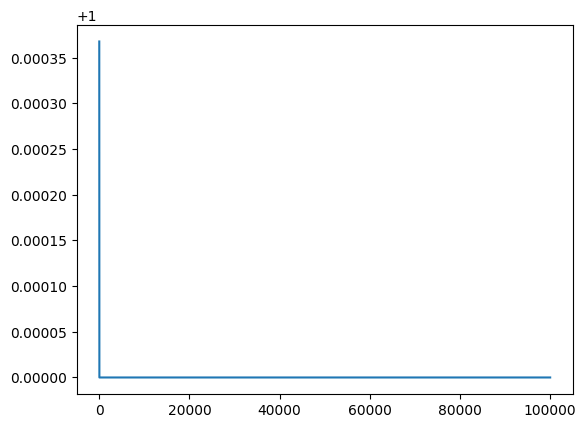

In [6]:

	
s=[2,2,1]
weights=createweights(s=s)
bias=createbias(s=s)		

w1 = []
w2 = []
b1 = []
b2 = []

grad_w_l1 = []
grad_w_l2 = []

grad_b_l1 = []
grad_b_l2 = []

errs = []
grad_errs = []
grad_2_errs = []
for i in range(100000):
    inputs=predict(X,weights, bias,s=s)
    errs.append(np.sum((inputs[-1]-y)**2))

    g_err = (inputs[-1]-y).T@d_sigmoid(inputs[-2],weights[-1],bias[-1])
    g2_err = (inputs[-1]-y).T@d2_sigmoid(inputs[-2],weights[-1],bias[-1])

    grad_errs.append(g_err)
    grad_2_errs.append(g2_err)

    w1.append(weights[0])
    w2.append(weights[1])

    
    b1.append(bias[0])
    b2.append(bias[1])

    
    print(np.sum(abs(inputs[-1]-y)))
    weights_new,bias_new,gradients_weight,gradients_bias=backprop(inputs,y, weights, bias, s=s,lr=1)
    grad_w_l1.append(gradients_weight[1])
    grad_w_l2.append(gradients_weight[0])
    grad_b_l1.append(gradients_bias[1])
    grad_b_l2.append(gradients_bias[0])


plt.plot(errs)


In [24]:
weights1_array = np.concatenate(w1).reshape(len(w1),2,2)
weights2_array = np.concatenate(w2).reshape(len(w2),2)

bias1_array = np.concatenate(b1).reshape(len(b1),2)
bias2_array = np.concatenate(b2).reshape(len(b2))

grad_weights1_array = np.concatenate(grad_w_l1).reshape(len(grad_w_l1),2,2)
grad_weights2_array = np.concatenate(grad_w_l2).reshape(len(grad_w_l2),2)
grad_bias1_array = np.concatenate(grad_b_l1).reshape(len(grad_b_l1),2)
grad_bias2_array = np.concatenate(grad_b_l2).reshape(len(grad_b_l2))


In [23]:
errs_array = np.array(errs)
grad_array = np.array(grad_errs)
grad_2_array = np.array(grad_2_errs)

In [29]:
grad_array = grad_array.reshape(len(grad_array))
grad_2_array = grad_2_array.reshape(len(grad_2_array))

The point in optimization where a solution is discovered and rapidly approached can be observed in the first difference of the cost. Prior to this event, the cost improves so little that it appears as though convergence may be reached, and termination criteria might wrongly terminate the algorithm and assume convergence.

In [74]:

def custom_error_plot(fr,to):
    fig,axs = plt.subplots(3,sharex=True,figsize=(8,8))
    axs[0].plot(errs_array[fr:to])
    axs[1].plot(grad_array[fr:to])
    axs[2].plot(grad_2_array[fr:to])
    axs[0].set_ylabel('Cost', size=13,labelpad=10)
    axs[1].set_ylabel('Cost First Gradient', size=13,labelpad=10)
    axs[2].set_ylabel('Cost Second Gradient', size=13,labelpad=10)
    fig.suptitle('Cost Convergence: Finding the Point\nWhere a Solution is Reached')
    fig.align_ylabels()
    plt.plot()

def custom_plot(fr,to):

    fig,axs = plt.subplots(9,3,sharex=True,figsize=(17,12))
    axs[0,0].set_ylabel('w_(2,1)', size=13,labelpad=10)
    axs[1,0].set_ylabel('w_(2,2)', size=13,labelpad=10)
    axs[2,0].set_ylabel('w_(1,1,1)', size=13,labelpad=10)
    axs[3,0].set_ylabel('w_(1,1,2)',size=13,labelpad=10)
    axs[4,0].set_ylabel('w_(1,2,1)',size=13,labelpad=10)
    axs[5,0].set_ylabel('w_(1,2,2)', size=13,labelpad=10)
    axs[6,0].set_ylabel('b_(2)', size=13,labelpad=10)
    axs[7,0].set_ylabel('b_(1,1)', size=13,labelpad=10)
    axs[8,0].set_ylabel('b_(1,2)', size=13,labelpad=10)

    axs[0,0].set_title('Parameter Value', size=13)
    axs[0,1].set_title('Gradient Value', size=13)
    axs[0,2].set_title('First Difference of Gradient Value', size=13)

    axs[0,0].plot(weights2_array[:,0][fr:to])
    axs[1,0].plot(weights2_array[:,1][fr:to])
    axs[2,0].plot(weights1_array[:,0,0][fr:to])
    axs[3,0].plot(weights1_array[:,0,1][fr:to])
    axs[4,0].plot(weights1_array[:,1,0][fr:to])
    axs[5,0].plot(weights1_array[:,1,1][fr:to])
    axs[6,0].plot(bias2_array[fr:to])
    axs[7,0].plot(bias1_array[:,0][fr:to])
    axs[8,0].plot(bias1_array[:,1][fr:to])

    axs[0,1].plot(grad_weights2_array[:,0][fr:to])
    axs[1,1].plot(grad_weights2_array[:,1][fr:to])
    axs[2,1].plot(grad_weights1_array[:,0,0][fr:to])
    axs[3,1].plot(grad_weights1_array[:,0,1][fr:to])
    axs[4,1].plot(grad_weights1_array[:,1,0][fr:to])
    axs[5,1].plot(grad_weights1_array[:,1,1][fr:to])
    axs[6,1].plot(grad_bias2_array[fr:to])
    axs[7,1].plot(grad_bias1_array[:,0][fr:to])
    axs[8,1].plot(grad_bias1_array[:,1][fr:to])

    axs[0,2].plot(np.diff(grad_weights2_array[:,0])[fr:to])
    axs[1,2].plot(np.diff(grad_weights2_array[:,1])[fr:to])
    axs[2,2].plot(np.diff(grad_weights1_array[:,0,0])[fr:to])
    axs[3,2].plot(np.diff(grad_weights1_array[:,0,1])[fr:to])
    axs[4,2].plot(np.diff(grad_weights1_array[:,1,0])[fr:to])
    axs[5,2].plot(np.diff(grad_weights1_array[:,1,1])[fr:to])
    axs[6,2].plot(np.diff(grad_bias2_array)[fr:to])
    axs[7,2].plot(np.diff(grad_bias1_array[:,0])[fr:to])
    axs[8,2].plot(np.diff(grad_bias1_array[:,1])[fr:to])

    fig.suptitle('Observing Convergence: Gradients Approaching Zero\nBefore and After Solution Event', size=16)
    #plt.sca(axs[8,2])
    #plt.xticks(range(to-fr), list(range(fr,to)), color='red')
    fig.align_ylabels()

    plt.tight_layout()
    plt.show()
    return


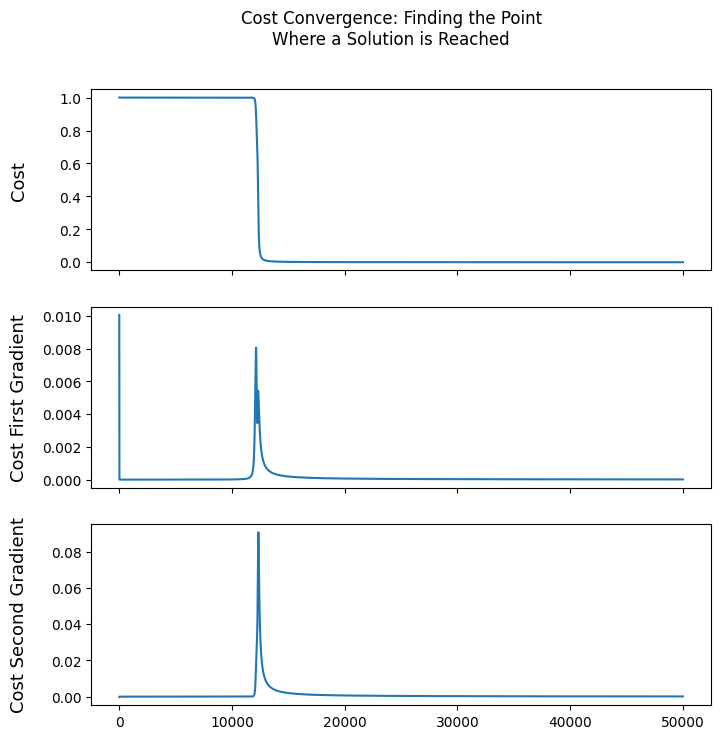

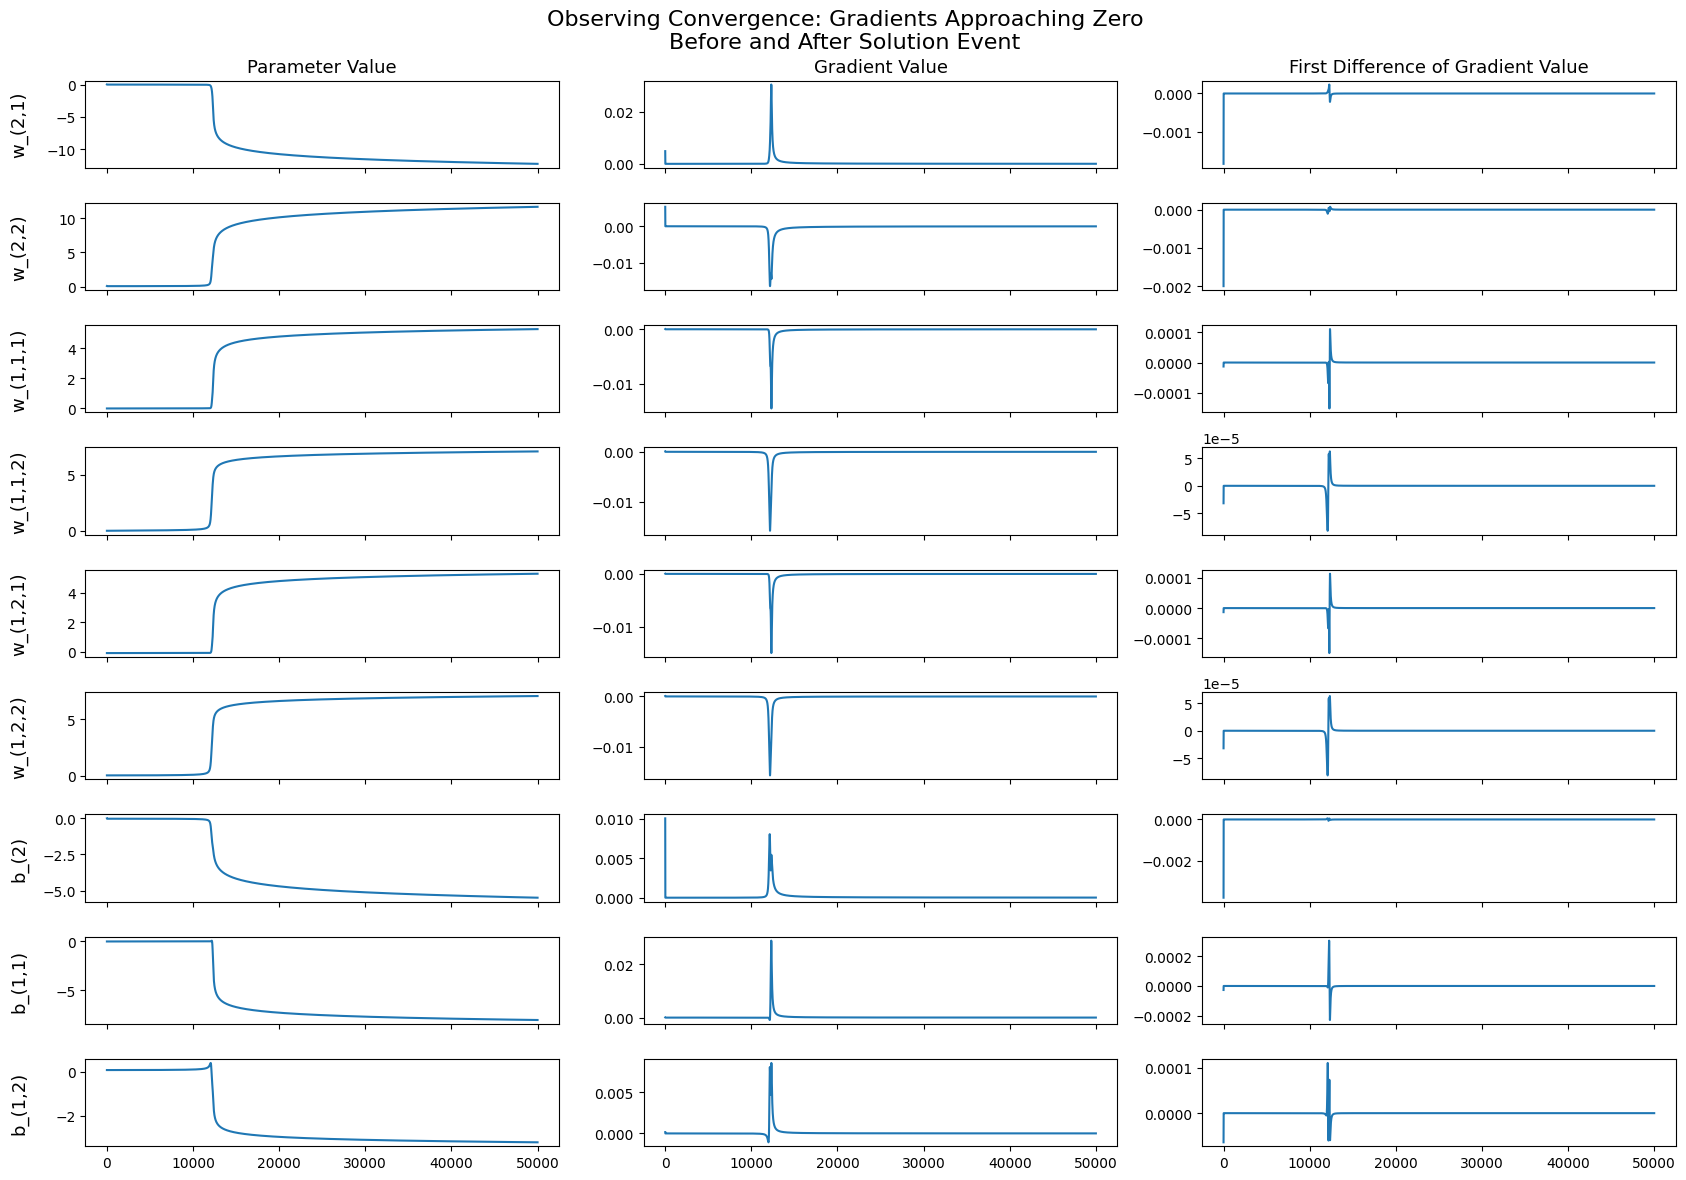

In [75]:

fr = 0
to = 50000

custom_error_plot(fr,to)
custom_plot(fr,to)

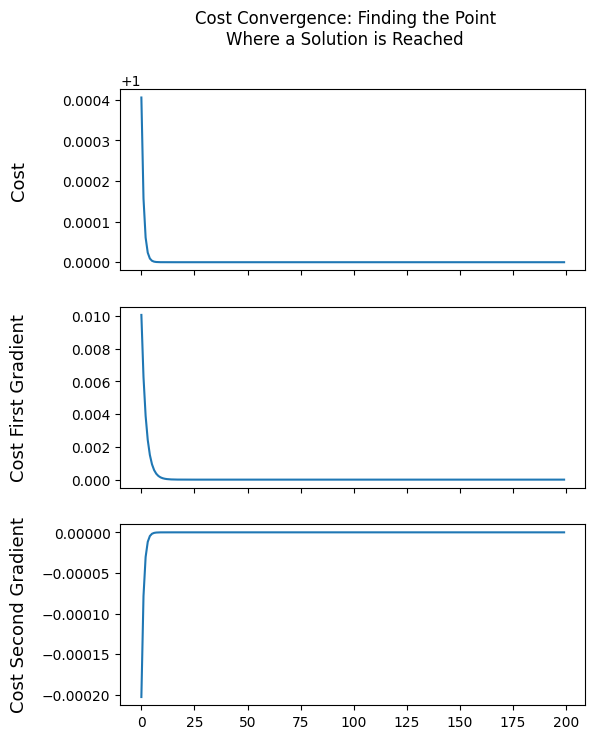

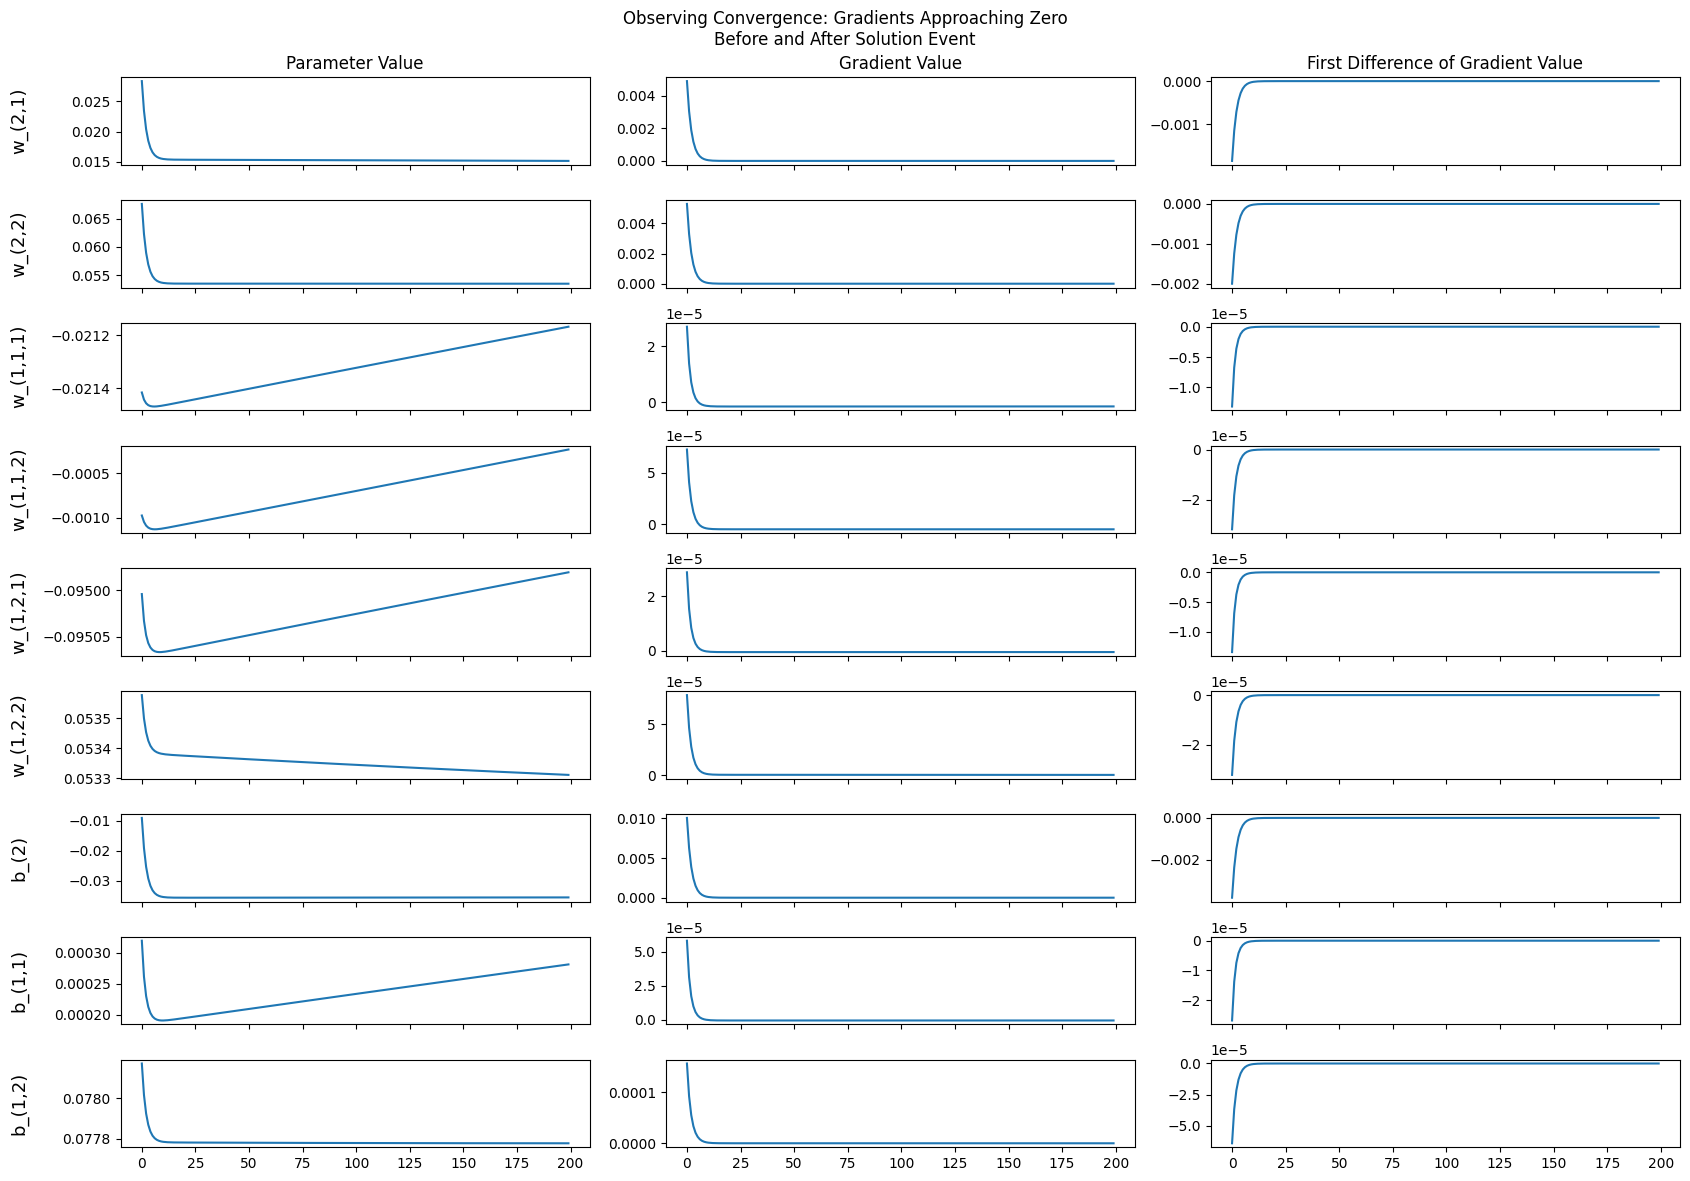

In [66]:
fr,to = 0,200

custom_error_plot(fr,to)
custom_plot(fr,to)

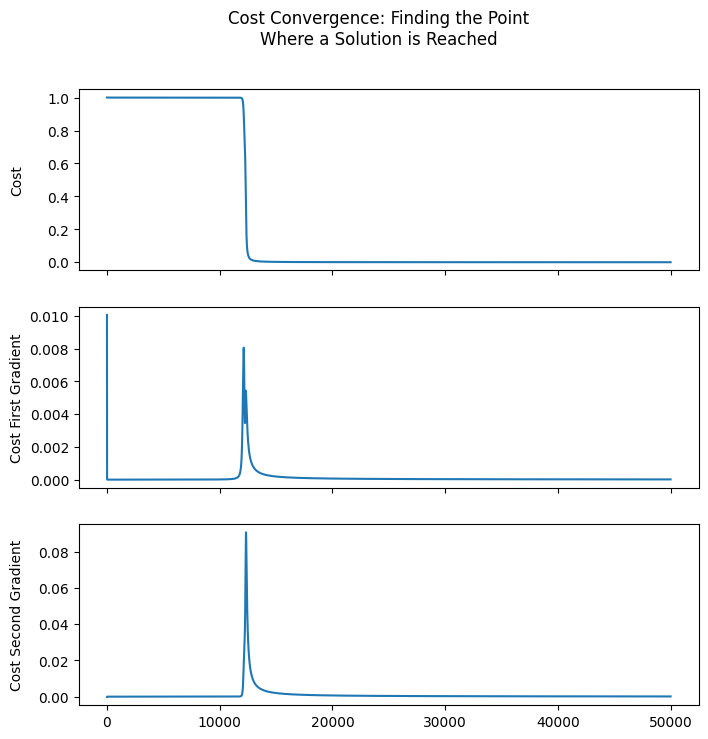

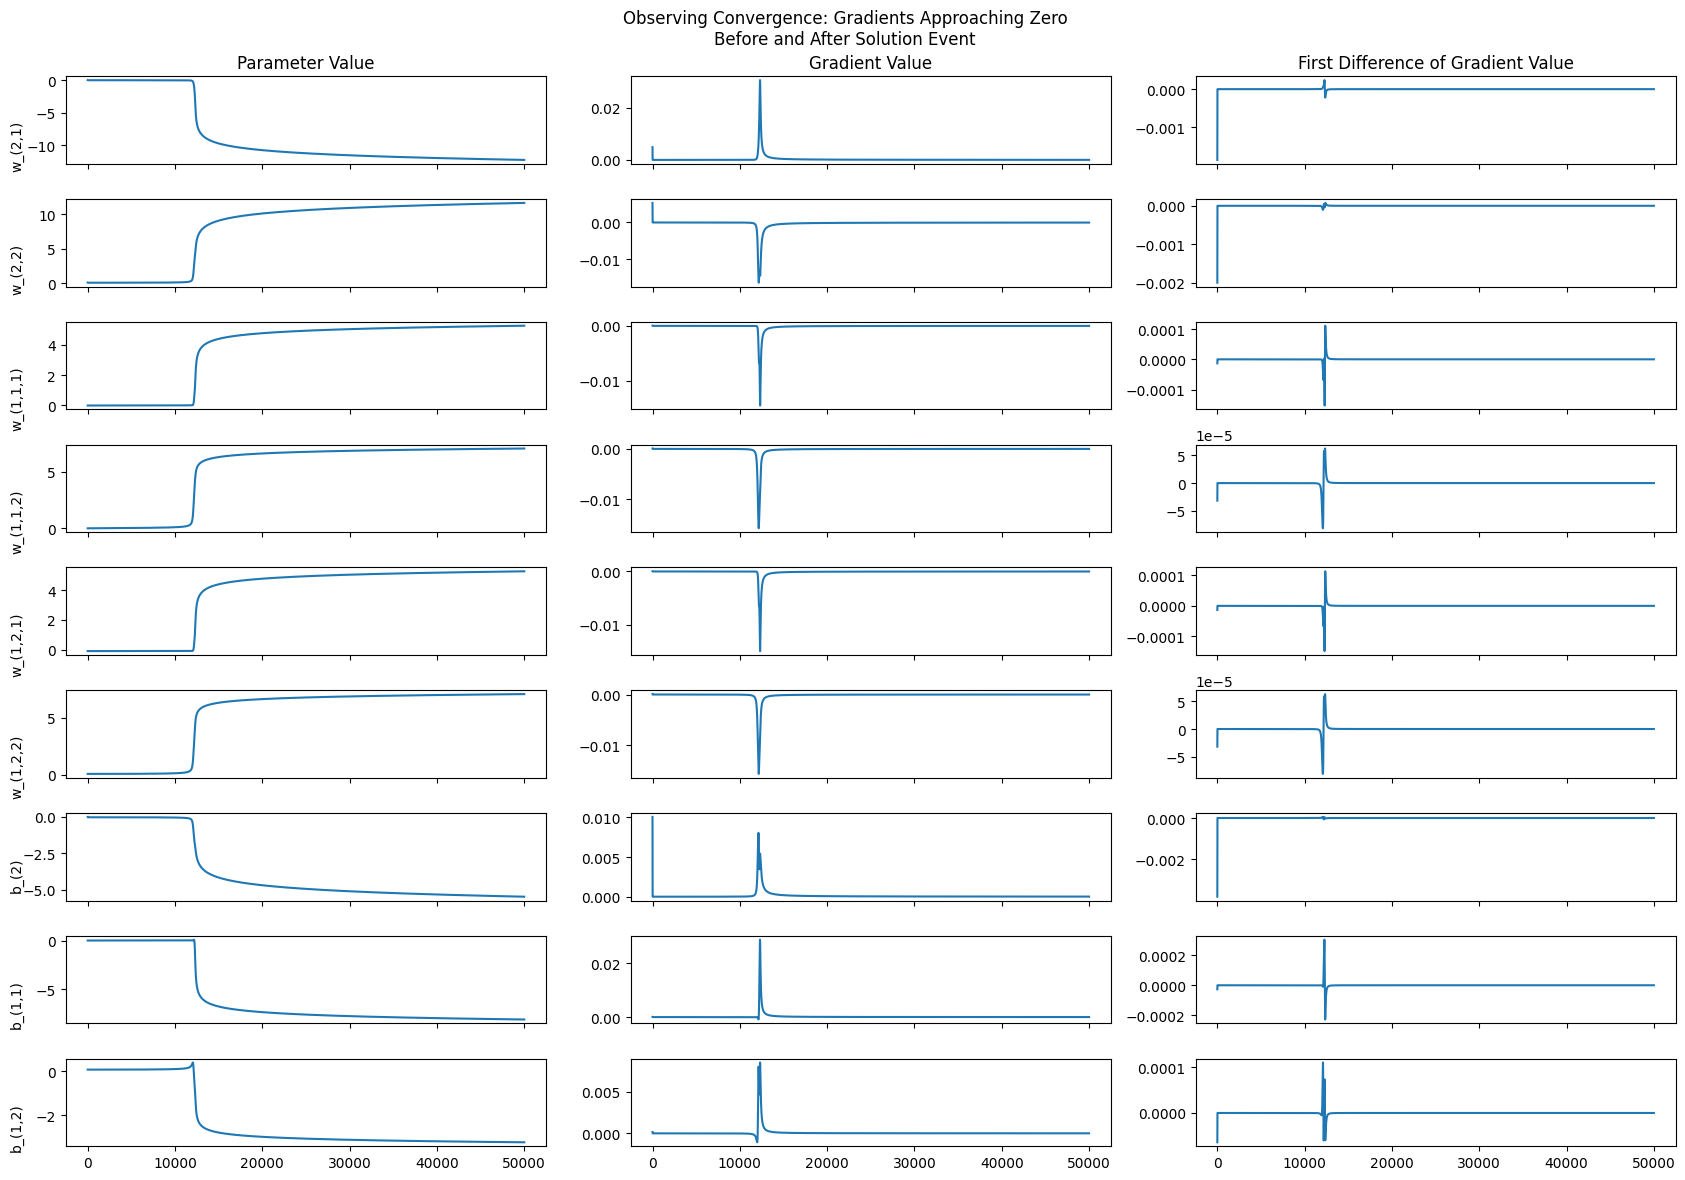

In [46]:
fr,to = 0,50000

custom_error_plot(fr,to)
custom_plot(fr,to)

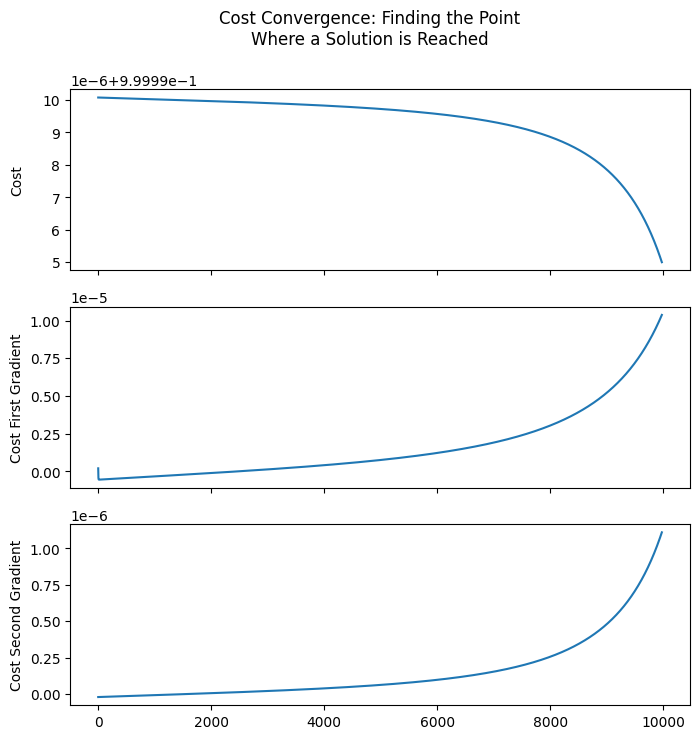

In [47]:

custom_error_plot(20,10000)

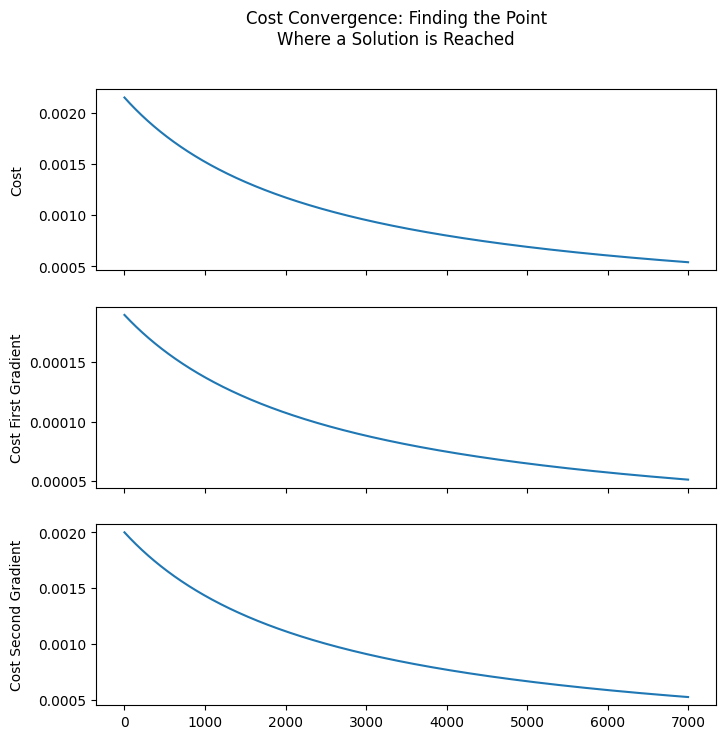

In [48]:
custom_error_plot(15000,22000)